In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import string
import scipy

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

border_width = 0.5
linewidth = 6.202
grey = "#BDBDBD"

sns.set_context("paper", rc={"font.size": 8,
                             "axes.labelsize": 8,
                             "xtick.labelsize": 8,
                             "ytick.labelsize": 8,
                             "legend.fontsize": 8,
                             "legend.title_fontsize": 8,
                             "axes.linewidth": border_width})

ts_green = "#3D8F24"
ts_purple = "#6E38CC"

In [3]:
names = ["chrom", "start", "end", "event_id", "chrom_2", "start_2", "end_2", "rep_time", "length"]

rep_time = pd.read_csv("final_population_template_switches.bed.replication_timing",
                       sep="\t",
                       header=None,
                       names=names)

In [4]:
rep_time

chrom      start        end event_id chrom_2    start_2      end_2  \
0     chr1    1456154    1456164     TS_1    chr1    1456119    1457119   
1     chr1    5071719    5071724     TS_2    chr1    5071439    5072439   
2     chr1    7058164    7058176     TS_3    chr1    7057439    7058439   
3     chr1    7816627    7816651     TS_4    chr1    7816439    7817439   
4     chr1    8255860    8255867     TS_5    chr1    8255439    8256439   
...    ...        ...        ...      ...     ...        ...        ...   
4705  chrX  147683392  147683414  TS_3317    chrX  147682981  147683981   
4706  chrX  148116827  148116829  TS_3318    chrX  148115979  148116979   
4707  chrX  154121676  154121681  TS_3319    chrX  154121028  154122028   
4708  chrX  154505326  154505343  TS_3320    chrX  154505168  154506168   
4709  chrX  155398339  155398348  TS_3321    chrX  155397838  155398838   

      rep_time  length  
0      77.9758      10  
1      21.8697       5  
2      56.2291      12  
3      64.6370      24  
4      74.8588       7  
...        ...     ...  
4705   12.7038      22  
4706   16.3815       2  
4707   46.2861       5  
4708   39.1854      17  
4709   24.3693       9  

[4710 rows x 9 columns]

In [5]:
microhomologies = pd.read_csv("../microhomology/microhomologies.tsv",
                       sep="\t")

microhomologies_geq10 = pd.read_csv("../microhomology/microhomologies_geq10.tsv",
                       sep="\t")

In [6]:
microhomologies

homology_12  homology_34  len_23  event_type event_id
0               8            2      11  3124, 1342     TS_1
1               0            2      11  1432, 3214     TS_2
2               2            2       9  3124, 1342     TS_3
3               2            2      24        1324     TS_4
4               0            1       4  3124, 1342     TS_5
...           ...          ...     ...         ...      ...
3317            1            0       5  1432, 3214  TS_3318
3318            2            2       6  1432, 3214  TS_3319
3319            1            2      13        1324  TS_3320
3320           10            6       6  3124, 1342  TS_3321
3321            2            4      13        1324  TS_3322

[3322 rows x 5 columns]

In [7]:
pd.merge(rep_time, microhomologies, how='inner', on=['event_id'])

chrom      start        end event_id chrom_2    start_2      end_2  \
0     chr1    1456154    1456164     TS_1    chr1    1456119    1457119   
1     chr1    5071719    5071724     TS_2    chr1    5071439    5072439   
2     chr1    7058164    7058176     TS_3    chr1    7057439    7058439   
3     chr1    7816627    7816651     TS_4    chr1    7816439    7817439   
4     chr1    8255860    8255867     TS_5    chr1    8255439    8256439   
...    ...        ...        ...      ...     ...        ...        ...   
4705  chrX  147683392  147683414  TS_3317    chrX  147682981  147683981   
4706  chrX  148116827  148116829  TS_3318    chrX  148115979  148116979   
4707  chrX  154121676  154121681  TS_3319    chrX  154121028  154122028   
4708  chrX  154505326  154505343  TS_3320    chrX  154505168  154506168   
4709  chrX  155398339  155398348  TS_3321    chrX  155397838  155398838   

      rep_time  length  homology_12  homology_34  len_23  event_type  
0      77.9758      10            8            2      11  3124, 1342  
1      21.8697       5            0            2      11  1432, 3214  
2      56.2291      12            2            2       9  3124, 1342  
3      64.6370      24            2            2      24        1324  
4      74.8588       7            0            1       4  3124, 1342  
...        ...     ...          ...          ...     ...         ...  
4705   12.7038      22            1            3      21  3124, 1342  
4706   16.3815       2            1            0       5  1432, 3214  
4707   46.2861       5            2            2       6  1432, 3214  
4708   39.1854      17            1            2      13        1324  
4709   24.3693       9           10            6       6  3124, 1342  

[4710 rows x 13 columns]

In [8]:
merged = pd.merge(rep_time, microhomologies, how='outer', indicator=True)

merged_df = merged[merged['_merge'] == 'both']

merged_df = merged_df.drop_duplicates(subset=["event_id"])

In [41]:
def create_cat_col(x):
    if (x >= 10):
        return "≥{}".format(10)
    if (x >= 6):
        return "6-9"
    elif (x >= 2):
        return "2-5"
    elif (x == 1):
        return "1"
    else:
        return "0"

In [42]:
# define categories of interest
merged_df["micro_bin_12"] = merged_df.homology_12.apply(create_cat_col)
merged_df["micro_bin_34"] = merged_df.homology_34.apply(create_cat_col)

In [43]:
def circled(x):
    return chr(0x245F+x)

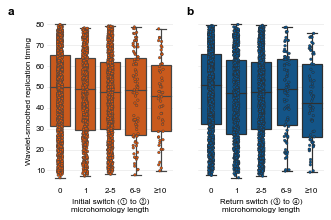

In [44]:
fig, ax = plt.subplots(1,2,figsize=(linewidth/1.25, linewidth/2), sharey=True)

pal_orange = ["#E65100", "#01579B"]

pal_blue = ["#E65100", "#01579B"]

pals = {
    "micro_bin_12": "#E65100",
    "micro_bin_34": "#01579B"
}

fpath = "/System/Library/Fonts/Supplemental/Arial Unicode.ttf"
prop = matplotlib.font_manager.FontProperties(fname=fpath)

ax_i = -1

for cat in ["micro_bin_12", "micro_bin_34"]:
    ax_i += 1
    sns.stripplot(data=merged_df, x=cat, y="rep_time",
                order=["0", "1", "2-5", "6-9", "≥10"],
                color=pals[cat],
                linewidth=.5,
                size=2.5,
                ax=ax[ax_i])
    sns.boxplot(data=merged_df, x=cat, y="rep_time",
                order=["0", "1", "2-5", "6-9", "≥10"],
                color=pals[cat],
                ax=ax[ax_i])


    x_offset = [-0.4,-0.7]

    # ax.text(x_offset[n], 1.01, string.ascii_lowercase[n], transform=a.transAxes, 
    #         size=12, weight='bold')
    ax[ax_i].tick_params(axis='y', which='major', pad=-2)
    ax[ax_i].tick_params(axis='x', which='major', pad=-2)

    ax[ax_i].set_xlabel("")
    sns.despine(ax=ax[ax_i], left=True, bottom=True)
    ax[ax_i].tick_params(axis="both",
                    which="both",
                    left=False, bottom=False)
    ax[ax_i].yaxis.grid(color="#e0e0e0",
                    linewidth=border_width)
    ax[ax_i].set_axisbelow(True)

x_offset = [-0.32,-0.1]

y_labs = ["Wavelet-smoothed replication timing",""]

x_labs = ["Initial switch\nmicrohomology", "Return switch\nmicrohomology"]

for n, a in enumerate(ax):
    a.text(x_offset[n], 1.01, string.ascii_lowercase[n], transform=a.transAxes, 
            size=12, weight='bold')
    a.tick_params(axis='y', which='major', pad=-2)
    a.tick_params(axis='x', which='major', pad=-2)

    ax[n].set_xlabel(x_labs[n])
    ax[n].set_ylabel(y_labs[n])
    sns.despine(ax=ax[n], left=True, bottom=True)
    a.tick_params(axis="both",
                  which="both",
                  left=False, bottom=False)

ax[0].set_xlabel("Initial switch ({} to {})\nmicrohomology length".format(circled(1), circled(2)), font=prop)
ax[1].set_xlabel("Return switch ({} to {})\nmicrohomology length".format(circled(3), circled(4)), font=prop)

# ax[0].set_ylabel("Wavelet-smoothed replication timing")
plt.subplots_adjust(wspace=0.2)


plt.savefig("microhomology_vs_replication_time.pdf",
             bbox_inches="tight",
             format="pdf")

In [31]:
test_dic = {}

for i,j in zip(merged_df["micro_bin_12"].to_list(), merged_df["rep_time"].to_list()):
    try:
        test_dic[i].append(j)
    except:
        test_dic[i] = []
        test_dic[i].append(j)

args = test_dic.values()

scipy.stats.kruskal(*args)

KruskalResult(statistic=7.787828452143219, pvalue=0.0996668866024059)

In [32]:
test_dic = {}

for i,j in zip(merged_df["micro_bin_34"].to_list(), merged_df["rep_time"].to_list()):
    try:
        test_dic[i].append(j)
    except:
        test_dic[i] = []
        test_dic[i].append(j)

args = test_dic.values()

scipy.stats.kruskal(*args)

KruskalResult(statistic=14.840099388780063, pvalue=0.005044614884293073)

In [33]:
from itertools import combinations

x = test_dic["0"]

for pairs in [sorted(",".join(map(str, comb)).split(",")) for comb in combinations(list(test_dic.keys()), 2)]:
    if "0" in pairs:
        y = test_dic[pairs[1]]
        print(pairs)
        print(scipy.stats.mannwhitneyu(x,y, alternative="greater"))

['0', '2-5']
MannwhitneyuResult(statistic=797589.5, pvalue=0.0007340201291939527)
['0', '1']
MannwhitneyuResult(statistic=481520.0, pvalue=0.002054166109200129)
['0', '≥10']
MannwhitneyuResult(statistic=49858.5, pvalue=0.02843928312811683)
['0', '6-9']
MannwhitneyuResult(statistic=56762.0, pvalue=0.33058446754394655)
